# Explore here

In [20]:
# Your code here
# Your code here

import pandas as pd

df = pd.read_csv("../data/raw/dataset_.csv")
df.head()


,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.describe()

,age,bmi,children,medical charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
missing_values_summary = df.isna().sum()
print(missing_values_summary)

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64


In [24]:
# Find duplicate rows
duplicates = df.duplicated()
print("Duplicate rows (Boolean Series):\n", duplicates)

Duplicate rows (Boolean Series):
 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


In [25]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 1


In [26]:
# Keep the first occurrence of duplicates
df_clean = df.drop_duplicates(keep='first')
print("\nDataFrame keeping the first occurrence of duplicates:\n", df_clean)


DataFrame keeping the first occurrence of duplicates:
       age     sex     bmi  children smoker     region  medical charges
0      19  female  27.900         0    yes  southwest      16884.92400
1      18    male  33.770         1     no  southeast       1725.55230
2      28    male  33.000         3     no  southeast       4449.46200
3      33    male  22.705         0     no  northwest      21984.47061
4      32    male  28.880         0     no  northwest       3866.85520
...   ...     ...     ...       ...    ...        ...              ...
1333   50    male  30.970         3     no  northwest      10600.54830
1334   18  female  31.920         0     no  northeast       2205.98080
1335   18  female  36.850         0     no  southeast       1629.83350
1336   21  female  25.800         0     no  southwest       2007.94500
1337   61  female  29.070         0    yes  northwest      29141.36030

[1337 rows x 7 columns]


In [27]:
# Confirm duplicate rows
duplicate_count = df_clean.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [28]:
df = df_clean

In [29]:
# Apply one-hot encoding

categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   age     bmi  children  medical charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0      16884.92400        True     False      False   
1   18  33.770         1       1725.55230       False      True       True   
2   28  33.000         3       4449.46200       False      True       True   
3   33  22.705         0      21984.47061       False      True       True   
4   32  28.880         0       3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             Fa

In [30]:
df_encoded = df_encoded.astype(int)
print(df_encoded.head())

   age  bmi  children  medical charges  sex_female  sex_male  smoker_no  \
0   19   27         0            16884           1         0          0   
1   18   33         1             1725           0         1          1   
2   28   33         3             4449           0         1          1   
3   33   22         0            21984           0         1          1   
4   32   28         0             3866           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4           

In [31]:
df = df_encoded

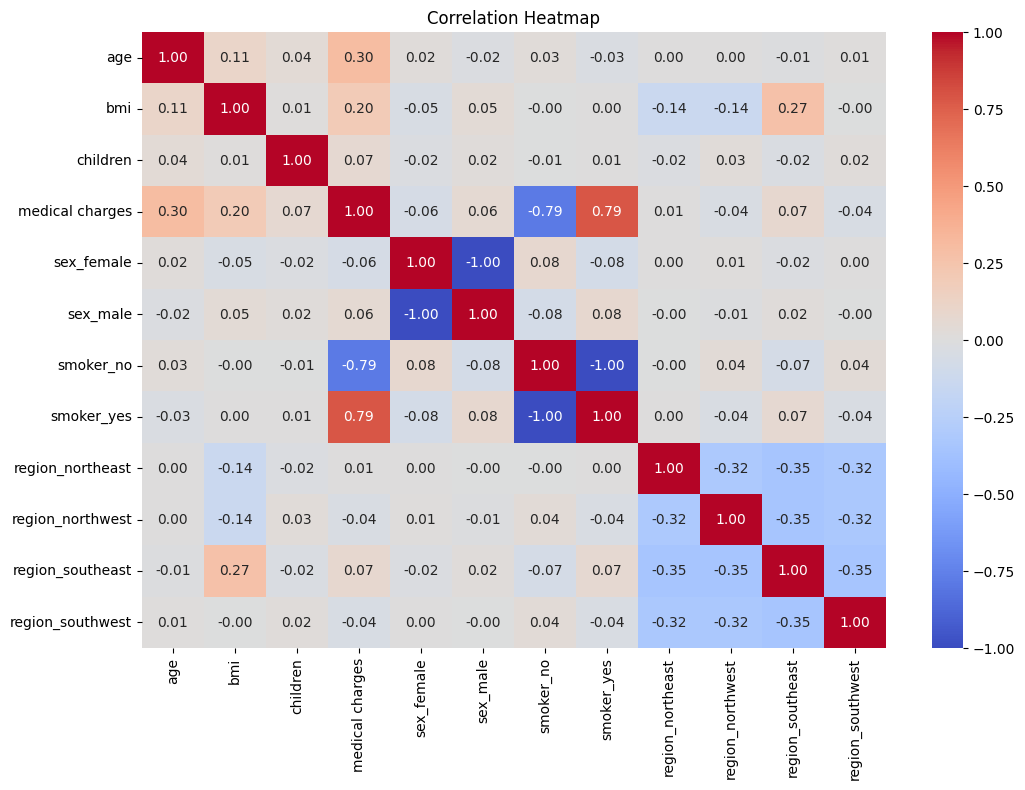

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

plt.figure(figsize=(12, 8))


# Heatmap of correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
#Train the model using Descision Tree Regeressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature columns and target variable
X = df.drop('medical charges', axis=1)  # Features
y = df['medical charges']  # Target variable

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
# Make predictions
y_pred = model.predict(X_test)


In [38]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2987.7555970149256
Mean Squared Error (MSE): 41199767.60354478
Root Mean Squared Error (RMSE): 6418.704511312604
R-squared (R²): 0.7757910026255955


In [39]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best**0.5
r2_best = r2_score(y_test, y_pred_best)

# Print metrics for the best model
print(f"Best Model MAE: {mae_best}")
print(f"Best Model MSE: {mse_best}")
print(f"Best Model RMSE: {rmse_best}")
print(f"Best Model R²: {r2_best}")


Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Model MAE: 2584.4653494516365
Best Model MSE: 19167895.99956012
Best Model RMSE: 4378.11557631364
Best Model R²: 0.8956883741385844


/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [40]:
#Make Predictions 
# Example feature values for prediction
feature_values = {
    'age': [45],
     'bmi': [22.5],
     'children': [2],
    'sex_female': [0], 
    'sex_male': [1], 
    'smoker_no': [0],  
    'smoker_yes': [1], 
    'region_northeast': [0], 
     'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0],  
}

# Create a DataFrame with these values
df_predict = pd.DataFrame(feature_values)
df_predict

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,45,22.5,2,0,1,0,1,0,0,1,0


In [41]:
# Make predictions using the best trained model
predictions = best_model.predict(df_predict)

# Output the predictions
print("Predicted Medical Charges:", predictions)


Predicted Medical Charges: [23153.19047619]


In [42]:
#Save the model

import pickle

# Save the model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)